In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [34]:
titanic = sns.load_dataset('titanic')
titanic

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
5           0       3    male   NaN      0      0    8.4583        Q   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
17          1       2    male   NaN      0      0   13.0000        S  Second   
18          0       3  female  31.0      1      0   18.0000        S   Third   
19          1       3  female   NaN      0      0    7.2250        C   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
26          0       3    male   NaN      0      0    7.2250        C   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
28          1       3  female   NaN      0      0    7.8792        Q   Third   
29          0       3    male   NaN      0      0    7.8958        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
863         0       3  female   NaN      8      2   69.5500        S   Third   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
868         0       3    male   NaN      0      0    9.5000        S   Third   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877         0       3    male  19.0      0      0    7.8958        S   Third   
878         0       3    male   NaN      0      0    7.8958        S   Third   
879  

In [94]:
df=titanic.drop(columns='deck')
df=df.dropna(subset=['age'])
df

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
18          0       3  female  31.0      1      0   18.0000        S   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
30          0       1    male  40.0      0      0   27.7208        C   First   
33          0       2    male  66.0      0      0   10.5000        S  Second   
34          0       1    male  28.0      1      0   82.1708        C   First   
35          0       1    male  42.0      1      0   52.0000        S   First   
37          0       3    male  21.0      0      0    8.0500        S   Third   
38          0       3  female  18.0      2      0   18.0000        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
856         1       1  female  45.0      1      1  164.8667        S   First   
857         1       1    male  51.0      0      0   26.5500        S   First   
858         1       3  female  24.0      0      3   19.2583        C   Third   
860         0       3    male  41.0      2      0   14.1083        S   Third   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877  

In [23]:
len((df[df['survived']==0])) #사망자

424

In [20]:
len((df[df['survived']==1])) #생존자

290

In [50]:
#df = df.set_index('pclass')
df3=df.groupby('pclass')
df3.mean()['survived']


pclass
1    0.655914
2    0.479769
3    0.239437
Name: survived, dtype: float64

In [51]:
df3=df.groupby('sibsp')
df3.mean()['survived']

sibsp
0    0.371550
1    0.530055
2    0.440000
3    0.333333
4    0.166667
5    0.000000
Name: survived, dtype: float64

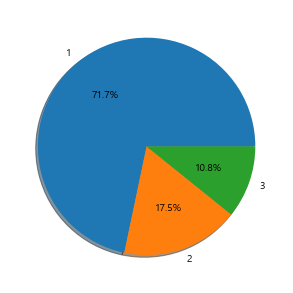

In [87]:
df4=df.groupby('pclass')
#df4.mean()['fare']
plt.figure(figsize=[5,5])
plt.pie(df4.mean()['fare'],labels=df4.mean()['fare'].index,
        autopct = '%.1f%%',shadow=True)
plt.show()

In [58]:
df5=df.groupby('alone')
df5.mean()['survived']

alone
False    0.516129
True     0.321782
Name: survived, dtype: float64

In [60]:
df6=df.groupby('sex')
df6.mean()['survived']

sex
female    0.754789
male      0.205298
Name: survived, dtype: float64

In [95]:
def fn(v):
    if v > 60:
        return '노년'
    elif 35 < v <= 60:
        return '장년'
    elif 25 < v <= 35:
        return '중년'
    elif 15 < v <= 25:
        return '청년'
    elif 1 <= v <=15:
        return '미성년자'

df['나이분류'] = df['age'].apply(fn)
df

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
18          0       3  female  31.0      1      0   18.0000        S   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
30          0       1    male  40.0      0      0   27.7208        C   First   
33          0       2    male  66.0      0      0   10.5000        S  Second   
34          0       1    male  28.0      1      0   82.1708        C   First   
35          0       1    male  42.0      1      0   52.0000        S   First   
37          0       3    male  21.0      0      0    8.0500        S   Third   
38          0       3  female  18.0      2      0   18.0000        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
856         1       1  female  45.0      1      1  164.8667        S   First   
857         1       1    male  51.0      0      0   26.5500        S   First   
858         1       3  female  24.0      0      3   19.2583        C   Third   
860         0       3    male  41.0      2      0   14.1083        S   Third   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877  

In [116]:
# plt.figure(figsize=[5,5])
# plt.pie(df['나이분류'],labels=df.pivot_table(index=['나이분류']).index )
# plt.show()
# df.pivot_table(index=['나이분류']).index
df['나이분류']

0        청년
1        장년
2        중년
3        중년
4        중년
6        장년
7      미성년자
8        중년
9      미성년자
10     미성년자
11       장년
12       청년
13       장년
14     미성년자
15       장년
16     미성년자
18       중년
20       중년
21       중년
22     미성년자
23       중년
24     미성년자
25       장년
27       청년
30       장년
33       노년
34       중년
35       장년
37       청년
38       청년
       ... 
856      장년
857      장년
858      청년
860      장년
861      청년
862      장년
864      청년
865      장년
866      중년
867      중년
869    미성년자
870      중년
871      장년
872      중년
873      장년
874      중년
875    미성년자
876      청년
877      청년
879      장년
880      청년
881      중년
882      청년
883      중년
884      청년
885      장년
886      중년
887      청년
889      중년
890      중년
Name: 나이분류, Length: 714, dtype: object

In [74]:
df7=df.groupby('나이분류')
df7.mean()[df7.mean()['survived']==df6.mean()['survived'].max()]


survived    pclass       age     sibsp     parch       fare  adult_male  \
나이분류                                                                            
미성년자  0.552632  2.657895  6.888158  1.802632  1.263158  32.373522         0.0   

         alone  
나이분류            
미성년자  0.078947

In [100]:
df11=df.pivot_table(index=['sex','pclass','나이분류'])
df11['survived']

sex     pclass  나이분류
female  1       노년      1.000000
                미성년자    0.666667
                장년      0.972222
                중년      1.000000
                청년      0.960000
        2       미성년자    1.000000
                장년      0.850000
                중년      0.920000
                청년      0.947368
        3       노년      1.000000
                미성년자    0.500000
                장년      0.142857
                중년      0.500000
                청년      0.485714
male    1       노년      0.083333
                미성년자    1.000000
                장년      0.370370
                중년      0.571429
                청년      0.363636
        2       노년      0.333333
                미성년자    1.000000
                장년      0.037037
                중년      0.090909
                청년      0.037037
        3       노년      0.000000
                미성년자    0.296296
                장년      0.068182
                중년      0.197368
                청년      0.108911
Name: survived, dtype: